In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from data_manipulation import preproc
from nltk.corpus import stopwords
from data_manipulation import candidate_list_split
sw = stopwords.words('english')
head_split = " ~ "

In [2]:
data = pd.read_csv('NEWfull_with_headlines.csv', encoding='utf8')
print("start data",len(data))
data = preproc(data)
print('processed data',len(data))

start data 10798
num of races: 2561
avg num of participants in a race: 1.9010517278385919
processed data 4659


In [3]:
data['totalvotes'].sum()

3962877246

In [4]:
data['winner'].sum() / len(data)

0.5496887744151105

In [5]:
r = data[data['party'] == "REPUBLICAN"]
d = data[data['party'] == "DEMOCRAT"]
i = data[(data['party'] != "REPUBLICAN")& (data['party'] != "DEMOCRAT")]
win_dict = {'R_WIN':r['winner'].sum(),
            'D_WIN':d['winner'].sum(),
            'I_WIN':i['winner'].sum(),
            'R_LOSS': 0- (len(r) - r['winner'].sum()),
            'D_LOSS': 0- (len(d) - d['winner'].sum()),
            'I_LOSS': 0- (len(i) - i['winner'].sum()),}
I_dict = {'WIN':win_dict['I_WIN'],
          'LOSS':win_dict['I_LOSS'],
          'ALL':len(i),}
R_dict = {'WIN':win_dict['R_WIN'],
          'LOSS':win_dict['R_LOSS'],
          'ALL':len(r),}
D_dict = {'WIN':win_dict['D_WIN'],
          'LOSS':win_dict['D_LOSS'],
          'ALL':len(d),}

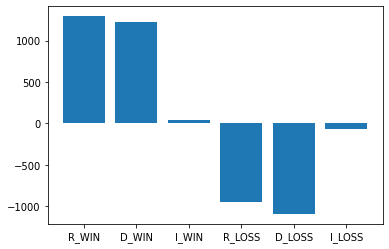

In [6]:
data2 = win_dict
names = list(data2.keys())
values = list(data2.values())
fig, ax = plt.subplots()

plt.bar(range(len(data2)), values, tick_label=names)
plt.show()

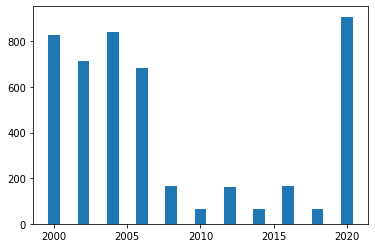

[(2020, 908), (2004, 839), (2000, 830), (2002, 714), (2006, 684), (2016, 167), (2008, 164), (2012, 162), (2018, 64), (2010, 64), (2014, 63)]


In [7]:
c_year = Counter(data['year'])
plt.bar(*zip(*c_year.most_common()))
plt.show()
print(c_year.most_common())

0.0	0.1	0	0	0.0
0.1	0.2	20	38	0.01244902339557845
0.2	0.3	223	247	0.10088001717106675
0.3	0.4	525	369	0.19188667095943335
0.4	0.5	458	410	0.1863060742648637
0.5	0.6	420	469	0.19081347928740072
0.6	0.7	398	521	0.19725262931959647
0.7	0.8	230	162	0.0841382270873578
0.8	0.9	48	21	0.014810045074050225
0.9	1.0	0	0	0.0


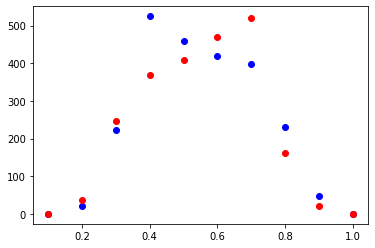

In [8]:
dembook = []
repbook = []
sharebook = []
for i in range(0,10):
    i = round(i* 0.1,1)
    j = round(i+1* 0.1,1)
    dshare = len(data[((data['percentvote'] > i) & (data['percentvote'] <= j)) & (data['party'] == "DEMOCRAT")])
    rshare = len(data[((data['percentvote'] > i) & (data['percentvote'] <= j)) & (data['party'] == "REPUBLICAN")])
    print(i, j, dshare , rshare, (rshare+dshare) / len(data), sep='\t')
    dembook.append((j,dshare))
    repbook.append((j,rshare))
    sharebook.append(((i+j)/2,(rshare+dshare) / len(data)))

plt.scatter(*zip(*dembook), c='b', label='dem')
plt.scatter(*zip(*repbook), c='r', label='rep')
#plt.scatter(*zip(*sharebook), c='black', label='tot')
plt.show()

0	1000	661	595	0.2695857480145954
1000	2000	286	289	0.12341704228375187
2000	3000	176	202	0.08113329040566646
3000	4000	136	131	0.05730843528654218
4000	5000	100	104	0.0437862202189311
5000	6000	74	82	0.0334835801674179
6000	7000	48	79	0.027259068469628677
7000	8000	63	55	0.02532732345996995
8000	9000	52	40	0.0197467267654003
9000	10000	43	42	0.018244258424554627


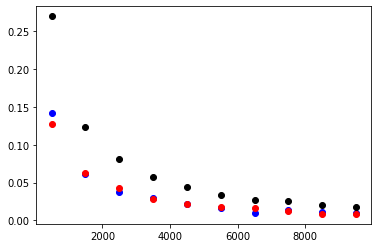

In [9]:
dembook = []
repbook = []
sharebook = []
for i in range(0,10):
    i = round(i   * 1000, 0)
    j = round(i+1 * 1000, 0)
    dshare = len(data[((data['headlines'].str.len() > i) & (data['headlines'].str.len() <= j)) 
                        & (data['party'] == "DEMOCRAT")])
    rshare = len(data[((data['headlines'].str.len() > i) & (data['headlines'].str.len() <= j)) 
                        & (data['party'] == "REPUBLICAN")])
    print(i, j, dshare , rshare, (rshare+dshare) / len(data), sep='\t')
    dembook.append(((i+j)/2,dshare / len(data)))
    repbook.append(((i+j)/2,rshare / len(data)))
    sharebook.append(((i+j)/2,(rshare+dshare) / len(data)))

plt.scatter(*zip(*dembook), c='b', label='dem')
plt.scatter(*zip(*repbook), c='r', label='rep')
plt.scatter(*zip(*sharebook), c='black', label='tot')
plt.show()

In [10]:
dWinX = data[((data['headlines'].str.len() > 0) & (data['headlines'].str.len() <= 1000)) & ((data['winner']==True) & (data['party'] == "DEMOCRAT"))]
rWinX = data[((data['headlines'].str.len() > 0) & (data['headlines'].str.len() <= 1000)) & ((data['winner']==True) & (data['party'] == "REPUBLICAN"))]
dLosX = data[((data['headlines'].str.len() > 0) & (data['headlines'].str.len() <= 1000)) & ((data['winner']==False) & (data['party'] == "DEMOCRAT"))]
rLosX = data[((data['headlines'].str.len() > 0) & (data['headlines'].str.len() <= 1000)) & ((data['winner']==False) & (data['party'] == "REPUBLICAN"))]

print("---------SHORT HEADLINES by party winners and losers---------")
print('D','winner','vote mean',dWinX['percentvote'].mean(),'\t', 'len mean', dWinX['headlines'].str.len().mean(), "\t total", len(dWinX))
print('R','winner','vote mean',rWinX['percentvote'].mean(),'\t', 'len mean', rWinX['headlines'].str.len().mean(), "\t total", len(rWinX))
print('D','losers','vote mean',dLosX['percentvote'].mean(),'\t', 'len mean', dLosX['headlines'].str.len().mean(), "\t total", len(dLosX))
print('R','losers','vote mean',rLosX['percentvote'].mean(),'\t', 'len mean', rLosX['headlines'].str.len().mean(), "\t total", len(rLosX))
print()
print(data[data['numcandidates'] != 2])

---------SHORT HEADLINES by party winners and losers---------
D winner vote mean 0.6194614680040861 	 len mean 488.12455516014234 	 total 281
R winner vote mean 0.5939116668126874 	 len mean 467.199203187251 	 total 251
D losers vote mean 0.33024724543415124 	 len mean 444.1078947368421 	 total 380
R losers vote mean 0.3106882005484787 	 len mean 428.7151162790698 	 total 344

      year          state state_po  state_fips  state_cen  state_ic    office  \
36    2020     NEW JERSEY       NJ          34         22        12  US HOUSE   
40    2020       VIRGINIA       VA          51         54        40  US HOUSE   
45    2000  MASSACHUSETTS       MA          25         14         3  US HOUSE   
49    2002       COLORADO       CO           8         84        62  US HOUSE   
63    2020        INDIANA       IN          18         32        22  US HOUSE   
...    ...            ...      ...         ...        ...       ...       ...   
4614  2002           OHIO       OH          39       

In [18]:
def find_elections(year:int, state:str, office:str=None):
    return data[((data.year == year) & (data.state == state)) & (True if not office else data.office==office)]

In [39]:
for id,df in find_elections(2020, "OHIO", office="US PRESIDENT").iterrows():
    print(df['candidate'], df['winner'], len(df['headlines'].split()), sep='\t')
    print(*Counter([wd for wd in df['headlines'].split() if wd not in sw]).most_common(15),sep='\t')

BIDEN, JOSEPH R. JR	False	17037
('opponent', 3383)	('candidate', 306)	('debate', 98)	('election', 68)	('campaign', 56)	('new', 45)	('voters', 41)	('virus', 39)	('democrats', 37)	('joe', 36)	('president', 36)	('states', 35)	('final', 33)	('poll', 33)	('presidential', 32)
TRUMP, DONALD J.	True	20301
('opponent', 3075)	('candidate', 961)	('president', 161)	('covid', 141)	('election', 127)	('us', 109)	('coronavirus', 92)	('states', 73)	('positive', 71)	('joe', 69)	('campaign', 63)	('house', 61)	('et', 58)	('says', 52)	('aired', 51)


In [40]:
for id,df in find_elections(2000, "OHIO", office="US PRESIDENT").iterrows():
    print(df['candidate'], df['winner'], len(df['headlines'].split()), sep='\t')
    print(*Counter([wd for wd in df['headlines'].split() if wd not in sw]).most_common(15),sep='\t')

BUSH, GEORGE W.	True	15386
('opponent', 3195)	('candidate', 561)	('campaign', 142)	('presidential', 105)	('election', 76)	('race', 65)	('ohio', 57)	('states', 54)	('candidates', 53)	('debate', 43)	('final', 39)	('us', 39)	('voters', 39)	('president', 37)	('polls', 35)
GORE, AL	False	1367
('opponent', 301)	('candidate', 32)	('campaign', 14)	('debate', 10)	('presidential', 9)	('ohio', 9)	('candidates', 7)	('election', 7)	('race', 5)	('clinton', 5)	('voters', 4)	('last', 4)	('role', 3)	('votes', 3)	('governor', 3)


In [8]:
TESTSET = pd.read_csv('models/test.csv').reset_index(drop=True)

In [9]:
example = TESTSET.sample(1)

In [18]:
x = list(example['headlines'].str.split())[0]
print(Counter(x))

Counter({'the': 4228, 'opponent': 3290, 'candidate': 681, 'in': 276, 'to': 238, 'for': 174, 'and': 158, 'campaign': 152, 'presidential': 119, 'on': 114, 'of': 112, 'a': 103, 'election': 96, 'race': 71, 'candidates': 69, 'states': 58, 'as': 53, 'pennsylvania': 53, 'polls': 52, 'is': 48, 'with': 47, 'president': 45, 'votes': 41, 'final': 40, 'days': 39, 'us': 37, 'day': 37, 'from': 37, 'at': 36, 'up': 36, 'debate': 36, 'governor': 36, 'vote': 33, 'campaigns': 33, 'his': 31, 'state': 29, 'florida': 27, 'gop': 26, 'over': 26, 'be': 25, 'voters': 25, 'key': 24, 'nader': 24, 'will': 24, 'political': 23, 'house': 23, 'by': 22, 'last': 22, 'white': 22, 'new': 22, 'go': 22, 'rally': 21, 'lead': 21, 'swing': 20, 'republican': 20, 'ad': 20, 'battle': 20, 'has': 19, 'wire': 18, 'close': 18, 'texas': 18, 'not': 18, 'one': 18, 'out': 18, 'social': 18, 'security': 18, 'says': 18, 'news': 18, 'battleground': 17, 'electoral': 16, 'poll': 16, 'tight': 16, 'trail': 16, 'evs': 16, 'big': 16, 'into': 16, '